In [1]:
#Задание 2.1
#Для датасета Davis:
#1) Удалите некорректные данные
#2) Выделите тестовую выборку из 50 экземпляров
#3) На тренировочных данных постройте:
#Гистограмму height
#Гистограмму weight
#Эти же гистограммы для разных полов
#4) На тренировочных данных обучите классификатор пола (sex), используя только признаки height и weight. Замерьте производительность на тренировочной и тестовой выборке (через Accuracy). Рекомендуемые модели:  логистическая регрессия, quadratic discriminant analysis.
#5) Отобразите точки из обучающей выборки на плоскости (height-weight). Покрасьте их цветами в зависимости от пола. Раскрасьте области в зависимости от пола, предсказанного обученным в п.4. классификатором. Сделайте аналогичный график на тестовой выборке

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
davis_df = pd.read_csv('CSV_files/Davis.csv')
davis_df

,Unnamed: 0,sex,weight,height,repwt,repht
0,1,M,77,182,77.0,180.0
1,2,F,58,161,51.0,159.0
2,3,F,53,161,54.0,158.0
3,4,M,68,177,70.0,175.0
4,5,F,59,157,59.0,155.0
...,...,...,...,...,...,...
195,196,M,74,175,71.0,175.0
196,197,M,83,180,80.0,180.0
197,198,M,81,175,NaN,NaN
198,199,M,90,181,91.0,178.0


In [4]:
#Удаление некорректных данных:

#Удаление лишнего столбца, не несущего полезную информацию
davis_df = davis_df.drop('Unnamed: 0', axis = 1)

#Удаление данных с отсутствующими признаками
davis_df = davis_df.dropna(axis = 0)

#Удаление данных с некорректными показателями роста и веса
davis_df = davis_df.loc[davis_df['height'] > 135]
davis_df = davis_df.loc[davis_df['weight'] > 35]

In [5]:
davis_df

,sex,weight,height,repwt,repht
0,M,77,182,77.0,180.0
1,F,58,161,51.0,159.0
2,F,53,161,54.0,158.0
3,M,68,177,70.0,175.0
4,F,59,157,59.0,155.0
...,...,...,...,...,...
194,F,62,164,61.0,161.0
195,M,74,175,71.0,175.0
196,M,83,180,80.0,180.0
198,M,90,181,91.0,178.0


In [6]:
#Выделение тестовой выборки из 50 экземпляров
davis_train, davis_test = train_test_split(davis_df, test_size = 50)

In [7]:
davis_test

,sex,weight,height,repwt,repht
57,M,73,183,74.0,180.0
149,M,88,184,86.0,183.0
5,M,76,170,76.0,165.0
3,M,68,177,70.0,175.0
185,F,56,162,56.0,160.0
101,M,63,178,63.0,175.0
172,M,61,170,61.0,170.0
83,F,60,167,55.0,163.0
198,M,90,181,91.0,178.0
123,F,55,165,55.0,163.0


In [8]:
#Построение гистограмм

#Разбиение данных по полу
male = davis_train.loc[davis_df['sex'] == 'M']
female = davis_train.loc[davis_df['sex'] == 'F']

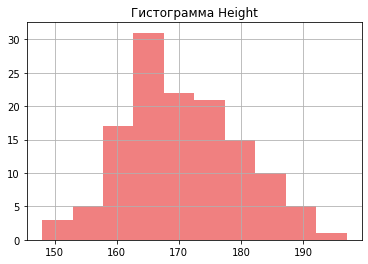

In [9]:
#Гистограмма height 
h = davis_train['height'].hist(color = 'lightcoral')
fig = h.get_figure()
h.set_title('Гистограмма Height')
fig.show()

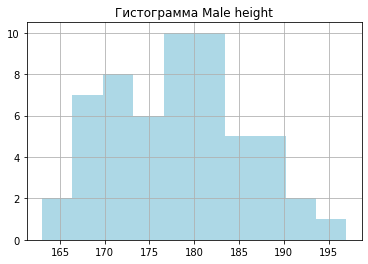

In [10]:
#Гистограмма Male height 
h = male['height'].hist(color = 'lightblue')
fig = h.get_figure()
h.set_title('Гистограмма Male height')
fig.show()

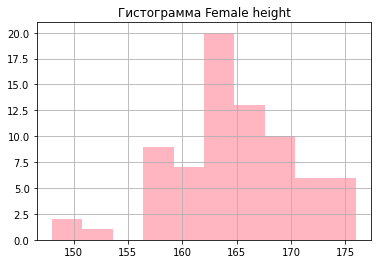

In [11]:
#Гистограмма Female height 
h = female['height'].hist(color = 'lightpink')
fig = h.get_figure()
h.set_title('Гистограмма Female height')
fig.show()

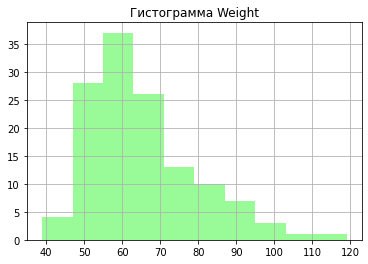

In [12]:
#Гистограмма Weight 
h = davis_train['weight'].hist(color = 'palegreen')
fig = h.get_figure()
h.set_title('Гистограмма Weight')
fig.show()

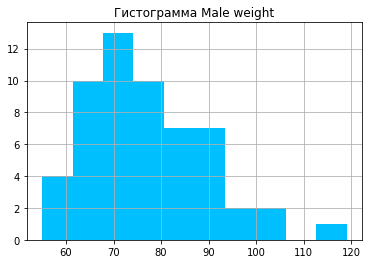

In [13]:
#Гистограмма Male weight 
h = male['weight'].hist(color = 'DeepSkyBlue')
fig = h.get_figure()
h.set_title('Гистограмма Male weight')
fig.show()

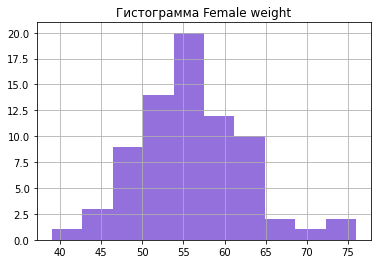

In [14]:
#Гистограмма Female weight 
h = female['weight'].hist(color = 'MediumPurple')
fig = h.get_figure()
h.set_title('Гистограмма Female weight')
fig.show()

In [15]:
#Замена значений пола с F и M на 0 и 1
davis_train = davis_train.replace('F', 0)
davis_train = davis_train.replace('M', 1)

davis_test = davis_test.replace('F', 0)
davis_test = davis_test.replace('M', 1)

In [16]:
#На тренировочных данных обучить классификатор пола (sex), используя только признаки height и weight. 

#Модель логистической регрессии
logistic_regression_classifier = LogisticRegression()

#Данные для обучения модели (тренировочная выборка)
x_train = davis_train[['height', 'weight']]
y_train = davis_train['sex']

#Тестовая выборка
x_test = davis_test[['height','weight']]
y_test = davis_test['sex']

#Обучение классификатора с помощью fit
logistic_regression_classifier.fit(x_train, y_train)

#Предсказания
predictions_sex_train = logistic_regression_classifier.predict(x_train)
predictions_sex_test = logistic_regression_classifier.predict(x_test)

In [17]:
#Замерить производительность на тренировочной выборке
accuracy_score(predictions_sex_train, y_train)

0.9

In [18]:
#Замерить производительность на тестовой выборке
accuracy_score(predictions_sex_test, y_test)

0.84

In [19]:
#Отобразить точки из обучающей выборки на плоскости (height-weight). 
#Покрасить их цветами в зависимости от пола. 
#Раскрасить области в зависимости от пола, предсказанного классификатором. Сделать аналогичный график на тестовой выборке
davis_train

,sex,weight,height,repwt,repht
40,0,54,164,53.0,160.0
143,0,54,176,55.0,176.0
15,0,65,166,66.0,165.0
107,0,57,167,55.0,164.0
36,0,56,166,54.0,165.0
...,...,...,...,...,...
45,0,54,160,55.0,158.0
28,0,39,157,41.0,153.0
144,0,64,171,66.0,171.0
134,1,83,177,84.0,175.0


In [20]:
#Координатные сетки для x1 и x2 (декартово произведение)
x1_min, x1_max = x_train['weight'].min()-0.5, x_train['weight'].max()+0.5

x2_min, x2_max = x_train['height'].min()-0.5, x_train['height'].max()+0.5

xx1, xx2 = np.mgrid[x1_min:x1_max:50j, x2_min:x2_max:50j]

In [21]:
#Построим из двух сеток данные для предсказания

x_pred = np.column_stack([xx2.reshape(-1), xx1.reshape(-1)])

y_pred = logistic_regression_classifier.predict(x_pred)

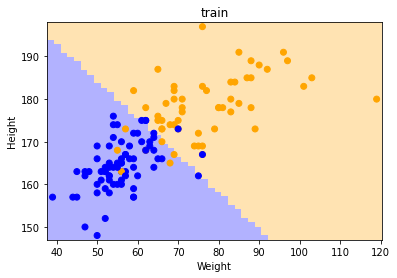

In [22]:
class_cmap = ListedColormap(['blue', 'orange'])

#Для тренировочной выборки
figure, ax = plt.subplots()

plt.pcolormesh(xx1, xx2, y_pred.reshape(xx1.shape), cmap = class_cmap, alpha = 0.3, shading = 'auto')
plt.scatter(x_train['weight'], x_train['height'], c = y_train, cmap = class_cmap)

ax.set_xlabel('Weight')
ax.set_ylabel('Height')
ax.set_title('train')

plt.show()

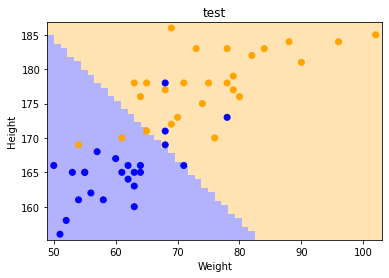

In [24]:
#Для тестовой выборки

x1_min, x1_max = x_test['weight'].min()-0.5, x_test['weight'].max()+0.5
x2_min, x2_max = x_test['height'].min()-0.5, x_test['height'].max()+0.5

xx1, xx2 = np.mgrid[x1_min:x1_max:50j, x2_min:x2_max:50j]

x_pred = np.column_stack([xx2.reshape(-1), xx1.reshape(-1)])
y_pred = logistic_regression_classifier.predict(x_pred)

figure, ax = plt.subplots()

plt.pcolormesh(xx1, xx2, y_pred.reshape(xx1.shape), cmap = class_cmap, alpha = 0.3, shading = 'auto')
plt.scatter(x_test['weight'], x_test['height'], c = y_test, cmap = class_cmap)

ax.set_xlabel('Weight')
ax.set_ylabel('Height')
ax.set_title('test')

plt.show()